In [1]:
from mpmath import scorergi, scorerhi
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from logreg_ccd import LogRegCCD, evaluate_model
from synthetic_data import generate_synthetic_data
np.random.seed(42)

In [2]:
p = 0.5  # Class prior probability
n = 100   # Number of samples
d = 25    # Dimension
g = 0.7  # Covariance matrix multiplier

X, y = generate_synthetic_data(p, n, d, g)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [3]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [4]:
# sklearn logitsic regression with no penalty
log_reg = LogisticRegression(penalty=None)
log_reg.fit(X_train, y_train)
accuracy_log_reg = accuracy_score(y_test, log_reg.predict(X_test))
print("Accuracy of sklearn Logistic Regression with no penalty:", accuracy_log_reg)

# sklearn logistic regression with L1 penalty
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_l1.fit(X_train, y_train)
accuracy_log_reg_l1 = accuracy_score(y_test, log_reg_l1.predict(X_test))
print("Accuracy of sklearn Logistic Regression with L1 penalty:", accuracy_log_reg_l1)

Accuracy of sklearn Logistic Regression with no penalty: 0.75
Accuracy of sklearn Logistic Regression with L1 penalty: 0.65


In [10]:
def train_and_plot(metric):
    print("Training Logistic Regression with metric={}".format(metric))
    log_reg_ccd = LogRegCCD(max_iter=1000)
    log_reg_ccd.fit(X_train, y_train, X_valid, y_valid, np.logspace(-4, 0, 100), metric=metric)
    score_log_reg_ccd = log_reg_ccd.validate(X_test, y_test, metric=metric)

    score_log_reg_l1 = evaluate_model(y_test, log_reg_l1.predict(X_test), log_reg_l1.predict_proba(X_test)[:, 1], metric=metric)
    print("Score of sklearn Logistic Regression with L1 penalty:", score_log_reg_l1)
    score_log_reg = evaluate_model(y_test, log_reg.predict(X_test), log_reg.predict_proba(X_test)[:, 1], metric=metric)
    print("Score of sklearn Logistic Regression with no penalty:", score_log_reg)

    print("Score of CCD Logistic Regression:", score_log_reg_ccd)
    print(log_reg_ccd.best_beta, log_reg_ccd.best_lambda)
    log_reg_ccd.plot(X_train, y_train, X_test, y_test, np.logspace(-4, 0, 100), metric=metric)
    log_reg_ccd.plot_coefficients(np.logspace(-4, 0, 100), X_train, y_train, metric=metric)

Training Logistic Regression with metric=balanced_accuracy
Score of sklearn Logistic Regression with L1 penalty: 0.6666666666666667
Score of sklearn Logistic Regression with no penalty: 0.7708333333333333
Score of CCD Logistic Regression: 0.5416666666666666
[ 0.45        0.3797004   0.          0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.25102602
 -0.         -0.          0.          0.          0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.        ] 0.4750810162102798


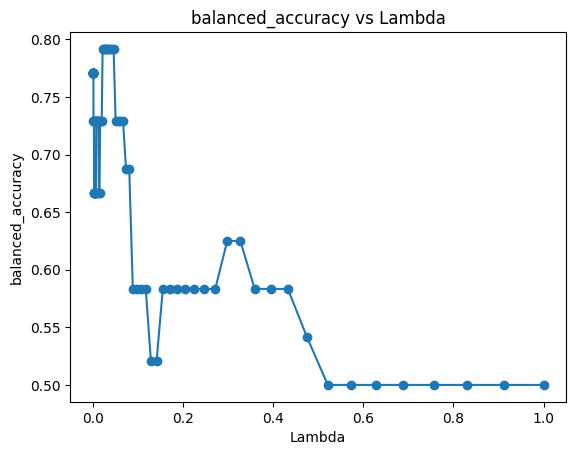

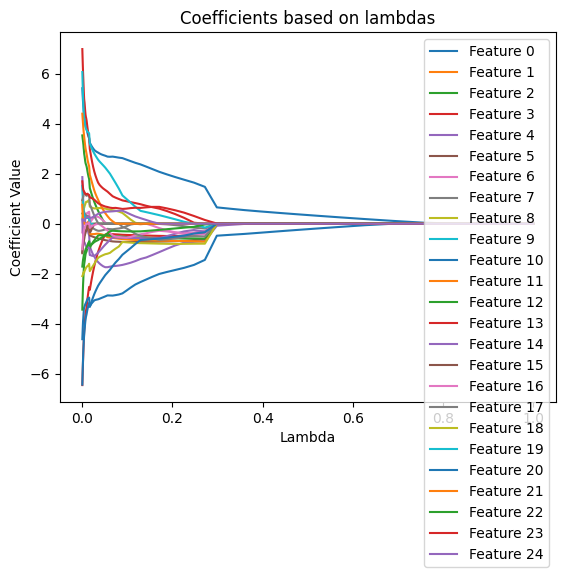

Training Logistic Regression with metric=precision
Score of sklearn Logistic Regression with L1 penalty: 0.5454545454545454
Score of sklearn Logistic Regression with no penalty: 0.6363636363636364
Score of CCD Logistic Regression: 0.46153846153846156
[ 0.45        1.7613685  -0.         -0.         -0.47958126 -0.75945383
 -0.68319837 -0.37830888 -0.10011331 -0.         -0.         -1.76648169
 -0.69282179 -0.58943889  0.23566984 -0.30800089 -0.         -0.40402772
 -0.53336868 -0.80543651  0.07848089 -0.4760583   0.         -0.15775721
  0.44383336  0.        ] 0.22570197196339215


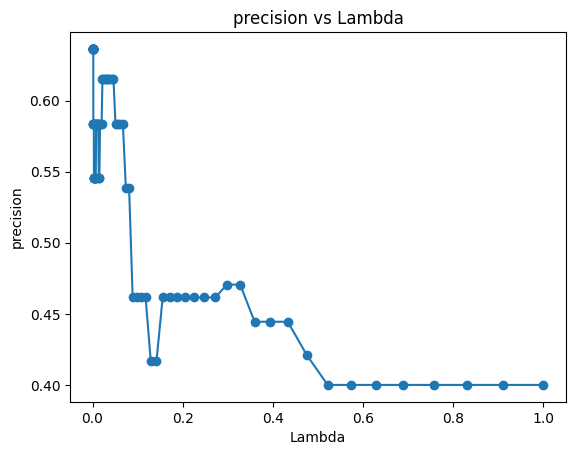

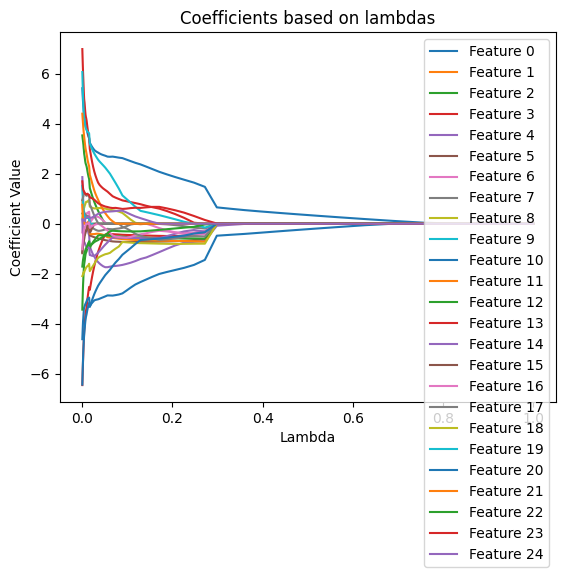

Training Logistic Regression with metric=recall
Score of sklearn Logistic Regression with L1 penalty: 0.75
Score of sklearn Logistic Regression with no penalty: 0.875
Score of CCD Logistic Regression: 1.0
[ 0.45        0.3797004   0.          0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.25102602
 -0.         -0.          0.          0.          0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.        ] 0.4750810162102798


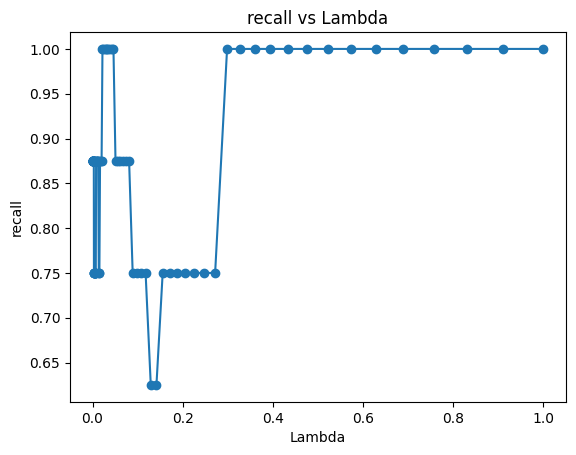

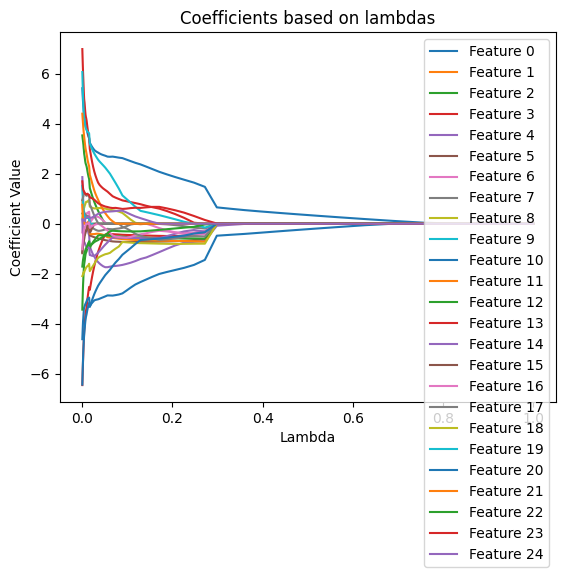

Training Logistic Regression with metric=f1
Score of sklearn Logistic Regression with L1 penalty: 0.631578947368421
Score of sklearn Logistic Regression with no penalty: 0.7368421052631579
Score of CCD Logistic Regression: 0.5925925925925926
[ 0.45        0.3797004   0.          0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.25102602
 -0.         -0.          0.          0.          0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.        ] 0.4750810162102798


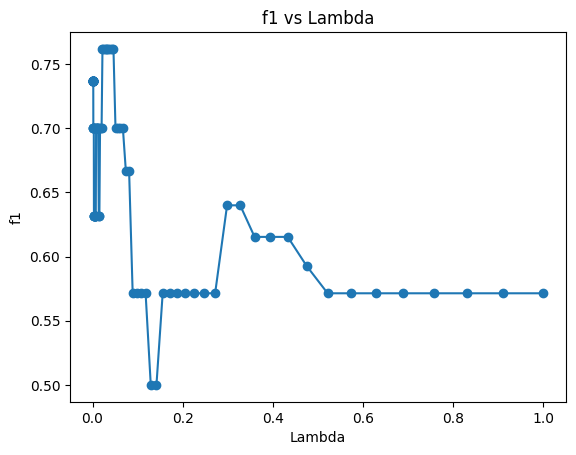

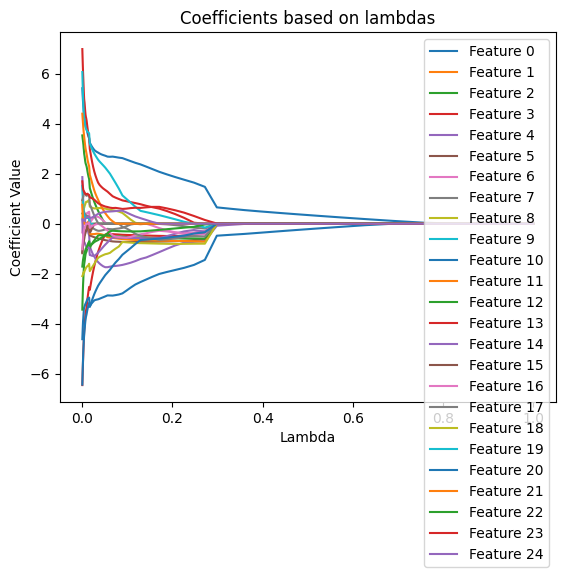

Training Logistic Regression with metric=auc_roc
Score of sklearn Logistic Regression with L1 penalty: 0.7083333333333333
Score of sklearn Logistic Regression with no penalty: 0.7187499999999999
Score of CCD Logistic Regression: 0.9479166666666667
[ 0.45        0.11262676  0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.          0.          0.
 -0.         -0.          0.         -0.          0.          0.
  0.          0.        ] 0.6892612104349702


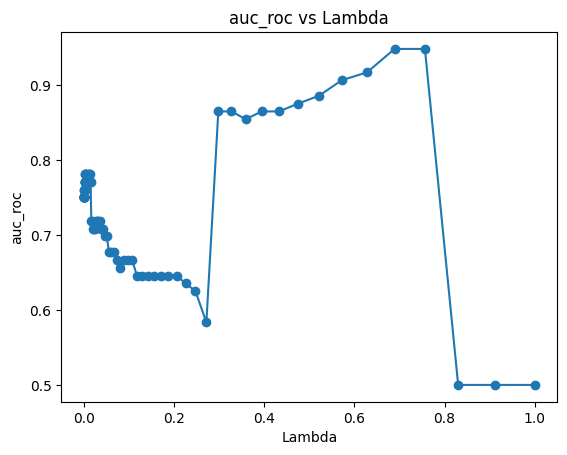

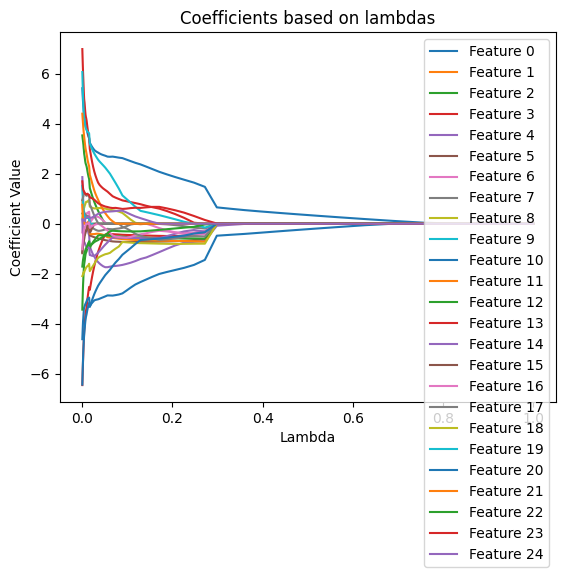

Training Logistic Regression with metric=auc_pr
Score of sklearn Logistic Regression with L1 penalty: 0.657179396379764
Score of sklearn Logistic Regression with no penalty: 0.537457426152279
Score of CCD Logistic Regression: 0.7
[ 0.45  0.    0.    0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.    0.   -0.    0.    0.   -0.   -0.    0.   -0.    0.    0.
  0.    0.  ] 0.8302175681319752


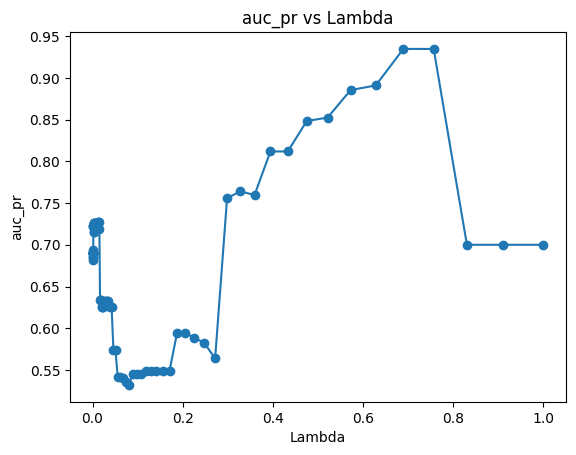

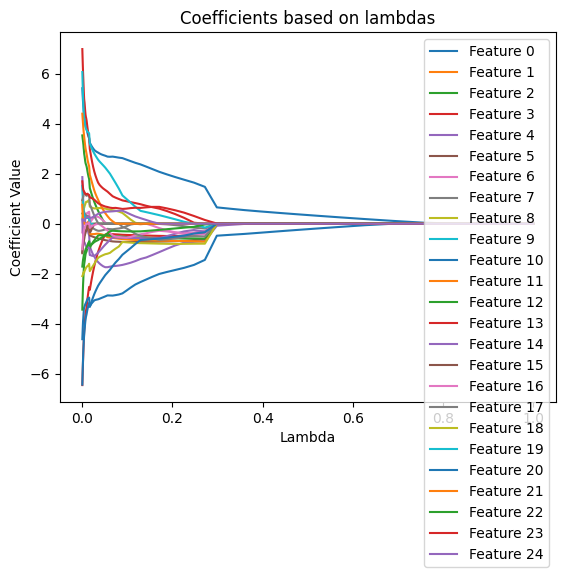

In [11]:
for metric in ["balanced_accuracy", "precision", "recall", "f1", "auc_roc", "auc_pr"]:
    train_and_plot(metric)